<a href="https://colab.research.google.com/github/Tonry12/Data_joyx2/blob/main/lotterry_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [154]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
lotto = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery.xlsx - since 30 years ago.csv')

In [156]:
lotto

,Date,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1
0,16/04/2024,943598,98,598,79,727,729,154,200
1,1/04/2024,803481,81,481,90,122,809,559,947
2,16/03/2024,997626,26,626,78,509,571,329,794
3,1/03/2024,253603,3,603,79,900,975,382,703
4,16/02/2024,941395,95,395,43,56,330,375,587
...,...,...,...,...,...,...,...,...,...
715,16/05/1994,2071764,64,764,29,93,544,535,746
716,2/05/1994,3072877,77,877,69,535,317,170,521
717,16/04/1994,7893913,13,913,21,785,982,151,594
718,1/04/1994,4269815,15,815,29,675,35,704,868


In [157]:
lotto.isnull().any()

Date           False
รางวัลที่ 1    False
2 ตัวบน        False
3 ตัวบน        False
2 ตัวล่าง      False
3 ตัวหน้า      False
3 ตัวหน้า.1    False
3 ตัวล่าง      False
3 ตัวล่าง.1    False
dtype: bool

In [158]:
lotto.rename(columns={'รางวัลที่ 1': '1st','3 ตัวบน':'top3','2 ตัวล่าง':'up2'},inplace=True)

In [159]:
lotto

,Date,1st,2 ตัวบน,top3,up2,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1
0,16/04/2024,943598,98,598,79,727,729,154,200
1,1/04/2024,803481,81,481,90,122,809,559,947
2,16/03/2024,997626,26,626,78,509,571,329,794
3,1/03/2024,253603,3,603,79,900,975,382,703
4,16/02/2024,941395,95,395,43,56,330,375,587
...,...,...,...,...,...,...,...,...,...
715,16/05/1994,2071764,64,764,29,93,544,535,746
716,2/05/1994,3072877,77,877,69,535,317,170,521
717,16/04/1994,7893913,13,913,21,785,982,151,594
718,1/04/1994,4269815,15,815,29,675,35,704,868


In [160]:
lt= lotto.iloc[:,0:5]

In [161]:
lt

,Date,1st,2 ตัวบน,top3,up2
0,16/04/2024,943598,98,598,79
1,1/04/2024,803481,81,481,90
2,16/03/2024,997626,26,626,78
3,1/03/2024,253603,3,603,79
4,16/02/2024,941395,95,395,43
...,...,...,...,...,...
715,16/05/1994,2071764,64,764,29
716,2/05/1994,3072877,77,877,69
717,16/04/1994,7893913,13,913,21
718,1/04/1994,4269815,15,815,29


In [162]:
lt = lt.drop(columns=['2 ตัวบน'])

In [163]:
lt

,Date,1st,top3,up2
0,16/04/2024,943598,598,79
1,1/04/2024,803481,481,90
2,16/03/2024,997626,626,78
3,1/03/2024,253603,603,79
4,16/02/2024,941395,395,43
...,...,...,...,...
715,16/05/1994,2071764,764,29
716,2/05/1994,3072877,877,69
717,16/04/1994,7893913,913,21
718,1/04/1994,4269815,815,29


In [164]:
lt.dtypes

Date    object
1st      int64
top3     int64
up2      int64
dtype: object

In [165]:
more = lt[lt['1st'] >= 999999]
more.count()

Date    20
1st     20
top3    20
up2     20
dtype: int64

In [166]:
lt = lt[lt['1st'] <= 999999]

In [167]:
lt['up2'] = lt['up2'].apply(lambda x: '{:02}'.format(x))

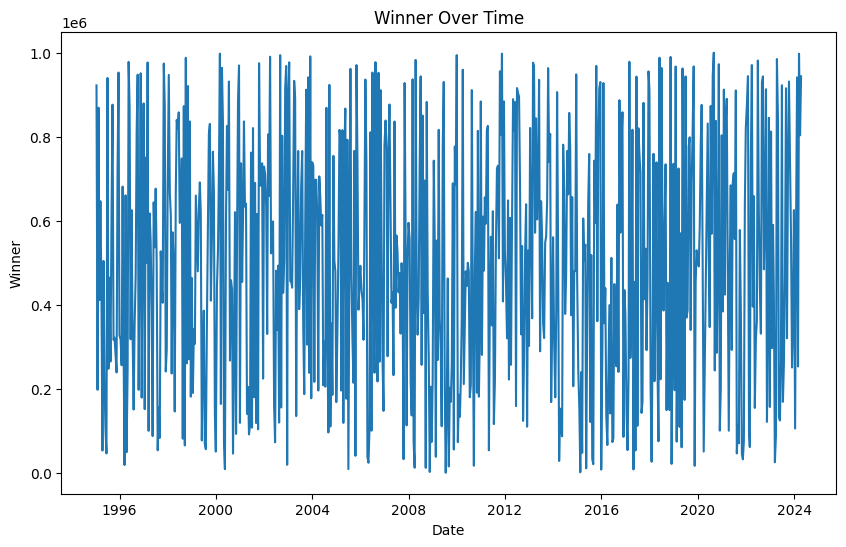

In [168]:
lt['Date'] = pd.to_datetime(lt['Date'])
plt.figure(figsize=(10,6))
plt.plot(lt['Date'], lt['1st'])
plt.title('Winner Over Time')
plt.xlabel('Date')
plt.ylabel('Winner')

plt.show()

<Axes: ylabel='1st'>

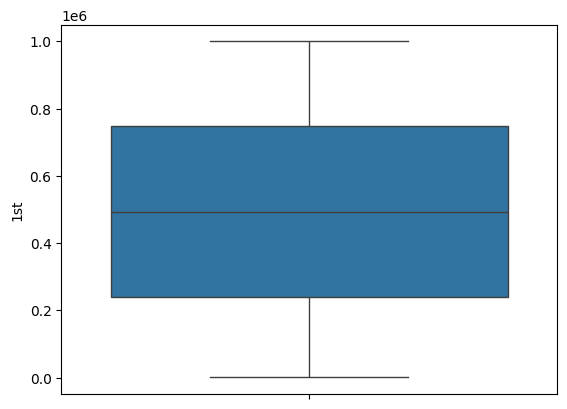

In [170]:
sns.boxplot(data=lt['1st'])

<Axes: ylabel='top3'>

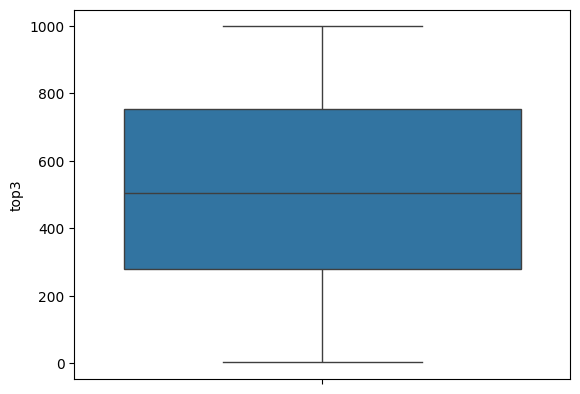

In [171]:
sns.boxplot(data=lt['top3'])

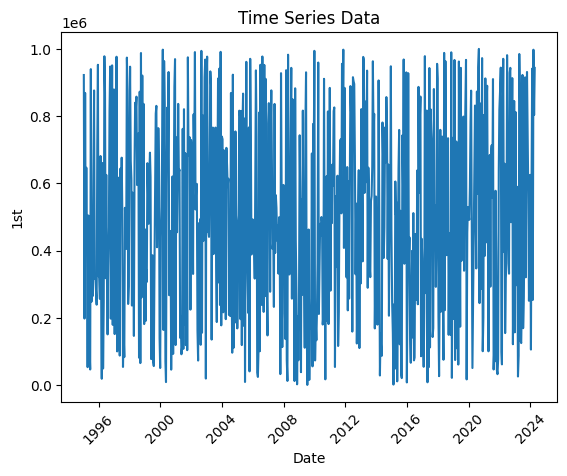

In [173]:
# Plot the time-series data
plt.plot(lt['Date'], lt['1st'])
plt.xlabel('Date')
plt.ylabel('1st')
plt.xticks(rotation = 45)
plt.title('Time Series Data')
plt.show()

In [174]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# Create and fit the AR model
model = AutoReg(lt['1st'], lags=1)
ar_model = model.fit()

# Make predictions
predictions = ar_model.predict(start=len(lt), end=len(lt)+3)  # Replace 3 with the number of future values to predict

print(predictions)


700    478663.857301
701    496708.429325
702    495974.625260
703    496004.466278
dtype: float64


## Split Date

In [175]:
lt['Year'] = pd.to_datetime(lt['Date']).dt.year
lt['Month'] = pd.to_datetime(lt['Date']).dt.month
lt['Day'] = pd.to_datetime(lt['Date']).dt.day

In [176]:
lt

,Date,1st,top3,up2,Year,Month,Day
0,2024-04-16,943598,598,79,2024,4,16
1,2024-04-01,803481,481,90,2024,4,1
2,2024-03-16,997626,626,78,2024,3,16
3,2024-03-01,253603,603,79,2024,3,1
4,2024-02-16,941395,395,43,2024,2,16
...,...,...,...,...,...,...,...
695,1995-03-16,646847,847,67,1995,3,16
696,1995-03-01,411454,454,71,1995,3,1
697,1995-02-16,869070,70,95,1995,2,16
698,1995-02-01,198162,162,48,1995,2,1


## เลือกแค่ 3 ปีย้อนหลัง

In [178]:
three_y = lt[lt['Date'] >= '2021-01-01']
three_y

,Date,1st,top3,up2,Year,Month,Day
0,2024-04-16,943598,598,79,2024,4,16
1,2024-04-01,803481,481,90,2024,4,1
2,2024-03-16,997626,626,78,2024,3,16
3,2024-03-01,253603,603,79,2024,3,1
4,2024-02-16,941395,395,43,2024,2,16
...,...,...,...,...,...,...,...
74,2021-03-16,890422,422,19,2021,3,16
75,2021-03-01,835538,538,73,2021,3,1
76,2021-02-16,424603,603,39,2021,2,16
77,2021-02-01,912307,307,97,2021,2,1


In [179]:
grouped_counts = three_y.groupby('up2').size().reset_index(name='Count')
grouped_counts

,up2,Count
0,02,1
1,03,1
2,05,1
3,06,1
4,07,1
5,08,1
6,09,3
7,10,1
8,11,1
9,14,4


In [180]:
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
9,14,4


In [181]:
three_y['up2_2'] = three_y['up2'].astype(str)

In [182]:
three_y['up2'] = three_y['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
three_y['Tens digit'] = three_y['up2'].apply(lambda x: int(x[0]))
three_y['Units digit'] = three_y['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [183]:
three_y

,Date,1st,top3,up2,Year,Month,Day,up2_2,Tens digit,Units digit
0,2024-04-16,943598,598,79,2024,4,16,79,7,9
1,2024-04-01,803481,481,90,2024,4,1,90,9,0
2,2024-03-16,997626,626,78,2024,3,16,78,7,8
3,2024-03-01,253603,603,79,2024,3,1,79,7,9
4,2024-02-16,941395,395,43,2024,2,16,43,4,3
...,...,...,...,...,...,...,...,...,...,...
74,2021-03-16,890422,422,19,2021,3,16,19,1,9
75,2021-03-01,835538,538,73,2021,3,1,73,7,3
76,2021-02-16,424603,603,39,2021,2,16,39,3,9
77,2021-02-01,912307,307,97,2021,2,1,97,9,7


In [184]:
three_y = three_y.drop(columns=['up2_2'])

In [185]:
three_y

,Date,1st,top3,up2,Year,Month,Day,Tens digit,Units digit
0,2024-04-16,943598,598,79,2024,4,16,7,9
1,2024-04-01,803481,481,90,2024,4,1,9,0
2,2024-03-16,997626,626,78,2024,3,16,7,8
3,2024-03-01,253603,603,79,2024,3,1,7,9
4,2024-02-16,941395,395,43,2024,2,16,4,3
...,...,...,...,...,...,...,...,...,...
74,2021-03-16,890422,422,19,2021,3,16,1,9
75,2021-03-01,835538,538,73,2021,3,1,7,3
76,2021-02-16,424603,603,39,2021,2,16,3,9
77,2021-02-01,912307,307,97,2021,2,1,9,7


### หาค่าซ้ำเลขท้าย 2 ตัวหลักที่ 1

In [186]:
grouped_counts = three_y.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
1,1,12


### หาค่าซ้ำเลขท้าย 2 ตัวหลักที่ 2

In [187]:
grouped_counts = three_y.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
9,9,13


### สรุปเลขท้าย 2 ของข้อมูล 3 ปีย้อนหลังทั้งหมด
- ตัวที่ซ้ำกันมากที่สุดคือ 14
- หลักแรกคือ 1 หลักที่2 คือ 9
- ดังนั้นเลขที่จะออกคือ 14 และ 19

## ทำนายงวด 16 พฤษภาคม

In [192]:
may_16 = lt[(lt['Month'] == 5) & (lt['Day'] == 16)]
may_16

,Date,1st,top3,up2,Year,Month,Day
22,2023-05-16,132903,903,99,2023,5,16
46,2022-05-16,155012,12,06,2022,5,16
70,2021-05-16,684579,579,14,2021,5,16
115,2019-05-16,962526,526,71,2019,5,16
139,2018-05-16,75629,629,20,2018,5,16
163,2017-05-16,454891,891,53,2017,5,16
187,2016-05-16,141737,737,98,2016,5,16
211,2015-05-16,11421,421,38,2015,5,16
235,2014-05-16,87523,523,20,2014,5,16
259,2013-05-16,687125,125,56,2013,5,16


In [194]:
# เลขท้าย 2 ตัวที่ออกบ่อยที่สุด
grouped_counts = may_16.groupby('up2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
6,20,3


In [195]:
may_16['up2'] = may_16['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
may_16['Tens digit'] = may_16['up2'].apply(lambda x: int(x[0]))
may_16['Units digit'] = may_16['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [196]:
# เลขท้ายสองตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
4,5,5


In [197]:
# เลขท้ายสองตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
6,6,5


In [198]:
# งวดปีล่าสุด
may_16[(may_16['Year'] == 2023)]

,Date,1st,top3,up2,Year,Month,Day,Tens digit,Units digit
22,2023-05-16,132903,903,99,2023,5,16,9,9


### สรุปเลขท้าย 2 ของงวดวันที่ 16-May 30 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 20 ทั้งหมด
- หลักที่1 คือ 5 หลักที่2 คือ 6
- ดังนั้นเลขที่จะออกคือ 20 และ 56